In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC


In [3]:
text_dataset=pd.read_csv('/content/drive/MyDrive/SIT-AstonHackathon/FinalDisasterTweets.csv')
text_dataset.head()

,num,text,timestamp,label
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,1
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,1
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.89792,1
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.76667,1
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,0


In [4]:
text_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41998 entries, 0 to 41997
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        41998 non-null  float64
 1   text       41998 non-null  object 
 2   timestamp  41998 non-null  object 
 3   label      41998 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [5]:
text_dataset['label'].value_counts()

1    31545
0    10453
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


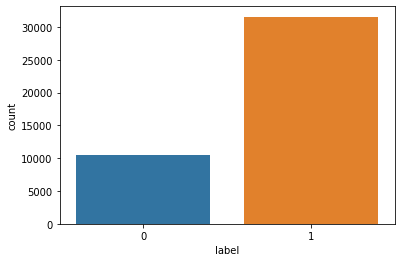

In [6]:
sns.countplot(text_dataset['label'])

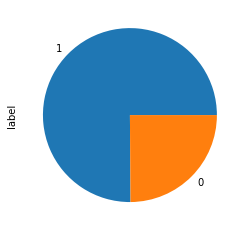

In [7]:
text_dataset.label.value_counts().plot(kind='pie')

In [8]:
text_dataset.isna().any()

num          False
text         False
timestamp    False
label        False
dtype: bool

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def form_sentence(text):
  tweet_blob = TextBlob(text)
  return ' '.join(tweet_blob.words)

print(form_sentence(text_dataset['text'].iloc[10]))
print(text_dataset['text'].iloc[10])

Wow Crazy day getting food for this week Tornado warnings taking shelter in the back of the store with others http fb.me/zJVBpmfg
Wow! Crazy day getting food for this week. Tornado warnings, taking shelter in the back of the store with others,... http://fb.me/zJVBpmfg


In [11]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(text_dataset['text'].iloc[10])))
print(text_dataset['text'].iloc[10])

['Wow', 'Crazy', 'day', 'getting', 'food', 'week', 'Tornado', 'warnings', 'taking', 'shelter', 'back', 'store', 'others', 'http']
Wow! Crazy day getting food for this week. Tornado warnings, taking shelter in the back of the store with others,... http://fb.me/zJVBpmfg


In [12]:
for i in range(0,len(text_dataset)):
  text_dataset['text'].iloc[i]=no_user_alpha(form_sentence(text_dataset['text'].iloc[i]))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
text_dataset.head()

,num,text,timestamp,label
0,0.0,"[RT, uberdogfound, Please, RT, Food, needed, s...",40657.975,1
1,1.0,"[Please, RT, Food, needed, shelter, NC, area, ...",40657.975,1
2,3.0,"[raining, tornado, warnings, coma, eating, food]",40657.89792,1
3,9.0,"[Lmao, damn, RT, LuCeCaNNoNn, get, food, hope,...",40657.76667,1
4,10.0,"[Saved, tornado, warning, ready, eat, good, food]",40657.75625,0


In [14]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(tweet_list)


['I', 'was', 'playing', 'with', 'my', 'friends', 'with', 'whom', 'I', 'used', 'to', 'play,', 'when', 'you', 'called', 'me', 'yesterday']


In [15]:
for i in range(0,len(text_dataset)):
  text_dataset['text'].iloc[i]=normalization(text_dataset['text'].iloc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
text_str=[]
def listToString(s): 
    
    str1 = " " 
    
    return (str1.join(s))  

for i in range(0,len(text_dataset)):
  text_str.append(listToString(text_dataset['text'].iloc[i]))

In [17]:
from nltk.probability import FreqDist
fdist=FreqDist()
for j in range(0,len(text_dataset)):
  for i in text_dataset['text'].iloc[j]:
    fdist[i]=fdist[i]+1

fdist  

FreqDist({'RT': 1336,
          'uberdogfound': 1,
          'Please': 557,
          'Food': 3242,
          'need': 1899,
          'shelter': 7971,
          'NC': 191,
          'area': 395,
          'hit': 1169,
          'hard': 215,
          'tornado': 2525,
          'contact': 45,
          'us': 753,
          'info': 105,
          'help': 1880,
          'rain': 499,
          'warn': 603,
          'coma': 6,
          'eat': 513,
          'food': 10037,
          'Lmao': 32,
          'damn': 148,
          'LuCeCaNNoNn': 1,
          'get': 3455,
          'hope': 467,
          'blow': 628,
          'yall': 49,
          'mouth': 11,
          'SoIDC': 1,
          'Saved': 8,
          'ready': 564,
          'good': 719,
          'uh': 13,
          'please': 464,
          'Mr': 32,
          'mlp_spike': 5,
          'tummy': 6,
          'already': 278,
          'hurt': 98,
          'much': 566,
          'candy': 19,
          'face': 139,
          'bite':

In [18]:
fdist.most_common(10)

[('Hurricane', 20467),
 ('http', 12188),
 ('https', 11901),
 ('food', 10037),
 ('car', 8271),
 ('shelter', 7971),
 ('Dorian', 7017),
 ('hurricane', 6054),
 ('Matthew', 5521),
 ('ride', 4094)]

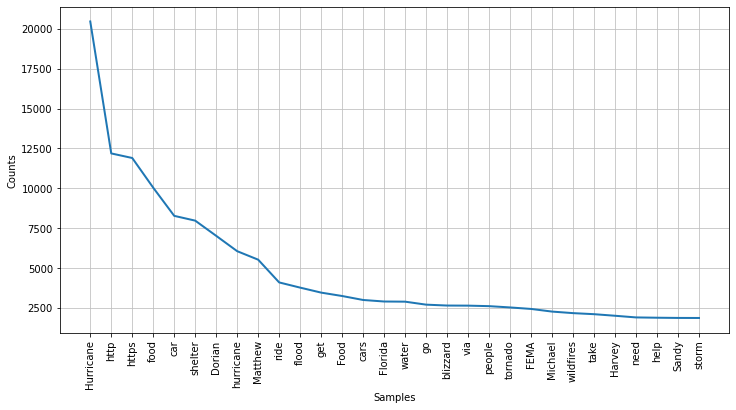

In [19]:
plt.figure(figsize=(12,6))
fdist.plot(30)
plt.show()

In [20]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [21]:
msg_train, msg_test, label_train, label_test = train_test_split(text_str, text_dataset['label'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)

In [22]:
from sklearn.metrics import f1_score
f1_score(label_test,predictions)

0.8788302784385056

In [23]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', BernoulliNB()),  
])

In [24]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
f1_score(label_test,predictions)

0.8906155703077853

In [25]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  
])

In [26]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
f1_score(label_test,predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9086966275330891

In [27]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SGDClassifier()),  
])

In [28]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
f1_score(label_test,predictions)

0.9048283971485265

In [29]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  
])

In [30]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
f1_score(label_test,predictions)

0.923771540371736

In [31]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearSVC()),  
])

In [32]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
f1_score(label_test,predictions)

0.9128708245736977

In [33]:
pipeline = Pipeline([
    ('bow',CountVectorizer(lowercase=False)),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', NuSVC()),  
])

In [34]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
f1_score(label_test,predictions)

ValueError: ignored